In [1]:
import pandas as pd
from ta import add_all_ta_features
from ta.utils import dropna\

ModuleNotFoundError: No module named 'ta'

In [2]:
import pandas as pd
import pandas_ta as ta

In [3]:
# Create a DataFrame so 'ta' can be used.
df = pd.DataFrame()

# Help about this, 'ta', extension
help(df.ta)

# List of all indicators
df.ta.indicators()

# Help about the log_return indicator
help(ta.log_return)

Help on AnalysisIndicators in module pandas_ta.core object:

class AnalysisIndicators(BasePandasObject)
 |  AnalysisIndicators(df, **kwargs)
 |  
 |  AnalysisIndicators is a class that extends the Pandas DataFrame via
 |  Pandas @pd.api.extensions.register_dataframe_accessor('name') decorator.
 |  
 |  This Pandas Extension is named 'ta' for Technical Analysis that allows us
 |  to apply technical indicators by extension.  Even though 'ta' is a
 |  Pandas DataFrame Extension, you can still call the Indicators
 |  individually. Use help() if needed.
 |  
 |  By default the 'ta' extension uses lower case column names: open, high,
 |  low, close, and volume.  You can override the defaults by providing the
 |  it's replacement name when calling the indicator.  For example, to call the indicator hl2().
 |  
 |  With 'default' columns: open, high, low, close, and volume.
 |  >>> df.ta.hl2()
 |  >>> df.ta(kind="hl2")
 |  
 |  With DataFrame columns: Open, High, Low, Close, and Volume.
 |  >>>

In [45]:
df = pd.read_json('11.01.2021.json')

In [46]:
df

,symbol,price2021-01-11,price2020-06-01,price_change,compare_to_btc
1,ETHUSDT,1111.5200,253.800,337.951143,28.70
2,BNBUSDT,39.7843,18.200,118.595055,-103.18
4,NEOUSDT,22.4660,13.200,70.196970,-243.26
5,LTCUSDT,145.0000,49.960,190.232186,-26.67
6,QTUMUSDT,2.9330,1.924,52.442827,-359.47
...,...,...,...,...,...
247,OGUSDT,2.9120,31.415,-90.730543,365.58
248,ATMUSDT,5.0250,36.000,-86.041667,380.05
249,ASRUSDT,3.1160,29.880,-89.571620,369.01
250,CELOUSDT,1.9241,4.120,-53.298544,552.09


In [47]:
print('Dataframe shape is: ', df.shape)

Dataframe shape is:  (235, 5)


In [48]:
df.columns

Index(['symbol', 'price2021-01-11', 'price2020-06-01', 'price_change',
       'compare_to_btc'],
      dtype='object')

In [49]:
df.info

<bound method DataFrame.info of        symbol  price2021-01-11  price2020-06-01  price_change  compare_to_btc
1     ETHUSDT        1111.5200          253.800    337.951143           28.70
2     BNBUSDT          39.7843           18.200    118.595055         -103.18
4     NEOUSDT          22.4660           13.200     70.196970         -243.26
5     LTCUSDT         145.0000           49.960    190.232186          -26.67
6    QTUMUSDT           2.9330            1.924     52.442827         -359.47
..        ...              ...              ...           ...             ...
247    OGUSDT           2.9120           31.415    -90.730543          365.58
248   ATMUSDT           5.0250           36.000    -86.041667          380.05
249   ASRUSDT           3.1160           29.880    -89.571620          369.01
250  CELOUSDT           1.9241            4.120    -53.298544          552.09
251   RIFUSDT           0.1552            0.500    -68.960000          449.42

[235 rows x 5 columns]>

In [50]:
df.describe()

,price2021-01-11,price2020-06-01,price_change,compare_to_btc
count,235.000000,235.000000,235.000000,235.000000
mean,169.240049,98.693810,24.901859,3922.549532
std,2058.462608,806.802286,132.469914,28763.349264
min,0.000072,0.000092,-99.848980,-13181.180000
25%,0.050515,0.078655,-63.628912,-151.105000
50%,0.514310,1.050000,-10.870654,352.090000
75%,4.030500,11.115000,62.276980,641.795000
max,31438.640000,9865.000000,740.126953,268179.800000


In [51]:
df.loc[4, 'price2021-01-11']

22.466

In [52]:
df.reset_index(inplace = True)

In [53]:
df.drop('index', axis=1)

,symbol,price2021-01-11,price2020-06-01,price_change,compare_to_btc
0,ETHUSDT,1111.5200,253.800,337.951143,28.70
1,BNBUSDT,39.7843,18.200,118.595055,-103.18
2,NEOUSDT,22.4660,13.200,70.196970,-243.26
3,LTCUSDT,145.0000,49.960,190.232186,-26.67
4,QTUMUSDT,2.9330,1.924,52.442827,-359.47
...,...,...,...,...,...
230,OGUSDT,2.9120,31.415,-90.730543,365.58
231,ATMUSDT,5.0250,36.000,-86.041667,380.05
232,ASRUSDT,3.1160,29.880,-89.571620,369.01
233,CELOUSDT,1.9241,4.120,-53.298544,552.09


In [54]:
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

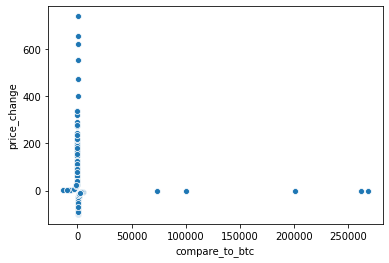

In [55]:
sns.scatterplot(y = df.price_change, x = df.compare_to_btc)

In [71]:
df[df['compare_to_btc'] > 50000]

,index,symbol,price2021-01-11,price2020-06-01,price_change,compare_to_btc
16,20,PAXUSDT,1.0004,1.0013,-0.089883,268179.80
17,23,USDCUSDT,1.0006,1.0030,-0.239282,100800.60
21,27,USDSUSDT,0.9968,1.0001,-0.329967,73125.05
66,73,BUSDUSDT,1.0005,1.0017,-0.119796,201240.17
216,233,XEMUSDT,0.2170,0.2172,-0.092081,261781.01


In [72]:
df1 = df.loc[(df['price_change']>0) & (df['compare_to_btc']<50000)]

In [73]:
type(df1)

pandas.core.frame.DataFrame

In [74]:
df1.reset_index(inplace=True)

In [75]:
df1

,level_0,index,symbol,price2021-01-11,price2020-06-01,price_change,compare_to_btc
0,0,1,ETHUSDT,1111.52000,253.800,337.951143,28.70
1,1,2,BNBUSDT,39.78430,18.200,118.595055,-103.18
2,2,4,NEOUSDT,22.46600,13.200,70.196970,-243.26
3,3,5,LTCUSDT,145.00000,49.960,190.232186,-26.67
4,4,6,QTUMUSDT,2.93300,1.924,52.442827,-359.47
...,...,...,...,...,...,...,...
96,201,218,YFIUPUSDT,13.19400,12.300,7.268293,-3215.20
97,203,220,INJUSDT,4.17570,1.490,180.248322,-33.68
98,209,226,AXSUSDT,0.52088,0.290,79.613793,-202.66
99,217,234,AAVEUPUSDT,19.54600,16.449,18.827892,-1179.80


In [76]:
df1.drop(['level_0', 'index'], axis=1)

,symbol,price2021-01-11,price2020-06-01,price_change,compare_to_btc
0,ETHUSDT,1111.52000,253.800,337.951143,28.70
1,BNBUSDT,39.78430,18.200,118.595055,-103.18
2,NEOUSDT,22.46600,13.200,70.196970,-243.26
3,LTCUSDT,145.00000,49.960,190.232186,-26.67
4,QTUMUSDT,2.93300,1.924,52.442827,-359.47
...,...,...,...,...,...
96,YFIUPUSDT,13.19400,12.300,7.268293,-3215.20
97,INJUSDT,4.17570,1.490,180.248322,-33.68
98,AXSUSDT,0.52088,0.290,79.613793,-202.66
99,AAVEUPUSDT,19.54600,16.449,18.827892,-1179.80


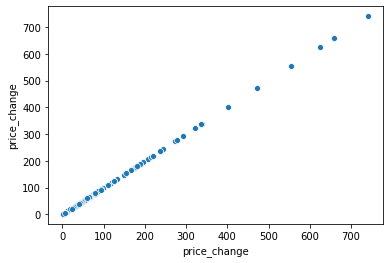

In [78]:
sns.scatterplot(y = df1.price_change, x = df1.price_change)

In [79]:
dfu350 = df1.loc[df1['price_change']<350]

In [80]:
dfa350 = df1.loc[df1['price_change']>350]

## Currencies that increased less than 4.5 times

In [81]:
dfu350

,level_0,index,symbol,price2021-01-11,price2020-06-01,price_change,compare_to_btc
0,0,1,ETHUSDT,1111.52000,253.800,337.951143,28.70
1,1,2,BNBUSDT,39.78430,18.200,118.595055,-103.18
2,2,4,NEOUSDT,22.46600,13.200,70.196970,-243.26
3,3,5,LTCUSDT,145.00000,49.960,190.232186,-26.67
4,4,6,QTUMUSDT,2.93300,1.924,52.442827,-359.47
...,...,...,...,...,...,...,...
96,201,218,YFIUPUSDT,13.19400,12.300,7.268293,-3215.20
97,203,220,INJUSDT,4.17570,1.490,180.248322,-33.68
98,209,226,AXSUSDT,0.52088,0.290,79.613793,-202.66
99,217,234,AAVEUPUSDT,19.54600,16.449,18.827892,-1179.80


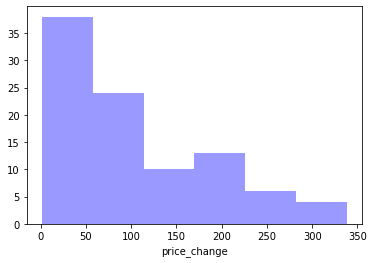

In [88]:
sns.distplot(dfu350.price_change, kde=False, color='b')

## Currencies that grew over 4.5 times

In [86]:
dfa350.describe()

,level_0,index,price2021-01-11,price2020-06-01,price_change,compare_to_btc
count,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
mean,72.833333,84.500000,30.236102,3.883469,575.270369,56.316667
std,44.727695,50.492574,43.689954,5.438900,124.292448,10.137648
min,19.000000,25.000000,0.019710,0.003016,402.659842,40.160000
25%,37.500000,43.750000,0.822455,0.129500,492.941762,50.890000
50%,75.500000,87.500000,3.868795,0.748400,588.947435,58.940000
75%,109.000000,126.000000,66.019425,7.977950,649.737368,62.895000
max,122.000000,139.000000,87.116000,11.490000,740.126953,67.440000
